In [261]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [262]:
data=pd.read_csv('/content/advertising.csv')

In [263]:
data.shape

(200, 4)

In [264]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [265]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [266]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [267]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [268]:
sales_count=data['Sales'].value_counts()
sales_count

Sales
11.9    5
16.7    5
20.7    4
11.0    3
11.3    3
       ..
13.4    1
24.2    1
8.1     1
5.5     1
25.5    1
Name: count, Length: 121, dtype: int64

In [269]:
sales_count.count()

121

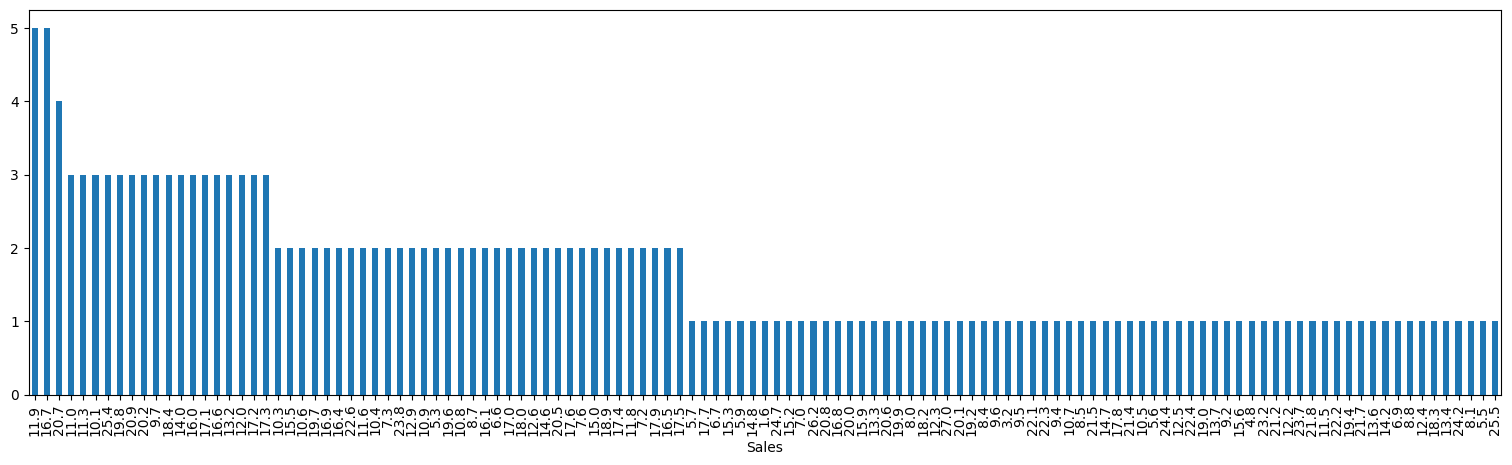

In [270]:
plt.figure(figsize=(19,5))
sales_count.plot(kind='bar')
plt.show()

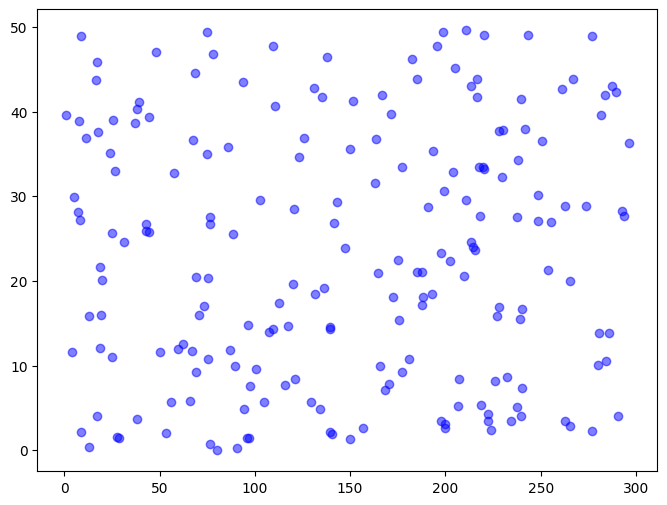

In [271]:
plt.figure(figsize=(8, 6))
plt.scatter(data['TV'], data['Radio'], color='blue', alpha=0.5)

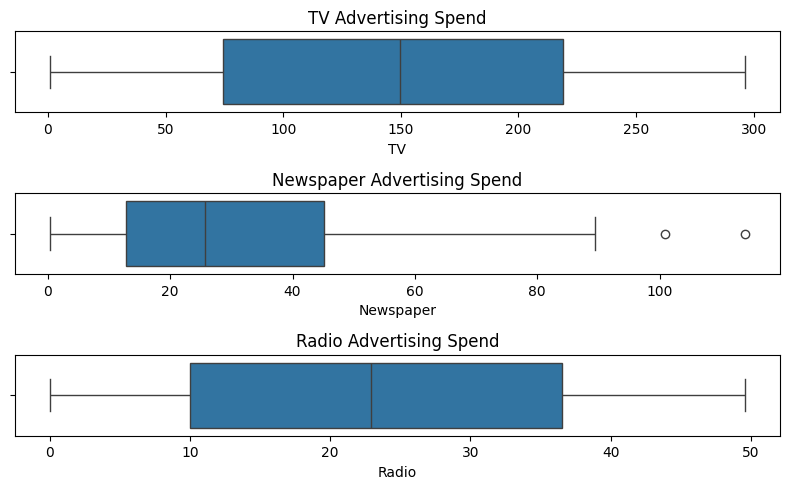

In [272]:
fig,axs=plt.subplots(3,figsize=(8,5))
sns.boxplot(data['TV'],ax=axs[0],orient='h').set(title='TV Advertising Spend')
sns.boxplot(data['Newspaper'],ax=axs[1],orient='h').set(title='Newspaper Advertising Spend')
sns.boxplot(data['Radio'],ax=axs[2],orient='h').set(title='Radio Advertising Spend')
plt.tight_layout()

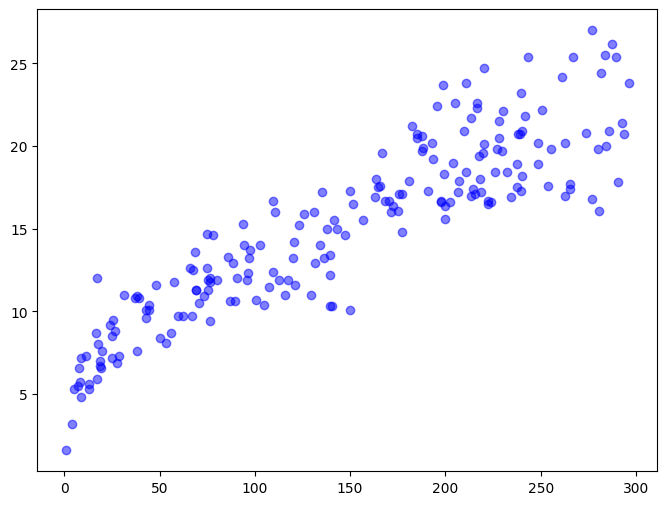

In [273]:
plt.figure(figsize=(8, 6))
plt.scatter(data['TV'], data['Sales'], color='blue', alpha=0.5)

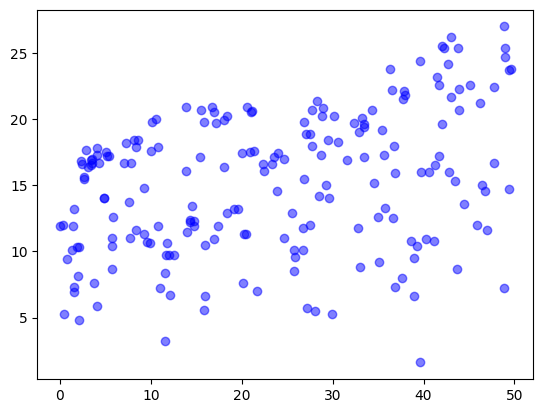

In [274]:
plt.scatter(data['Radio'], data['Sales'], color='blue', alpha=0.5)

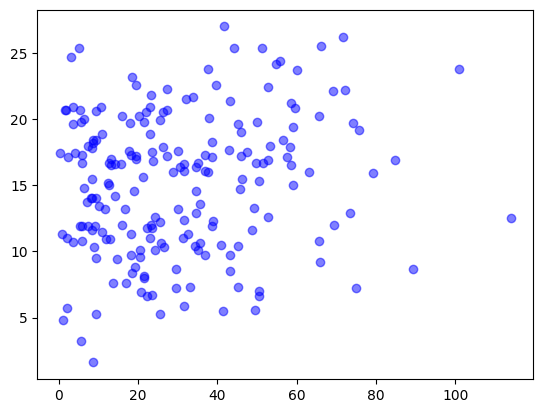

In [275]:
plt.scatter(data['Newspaper'], data['Sales'], color='blue', alpha=0.5)

In [276]:
column = data.select_dtypes(include=['float', 'int'])
correlation_matrix = column.corr()
print(correlation_matrix)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


<Axes: >

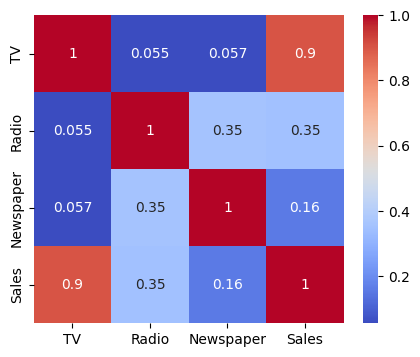

In [277]:
#heatmap
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(correlation_matrix,annot=True,ax=ax,cmap='coolwarm')

In [278]:
X=data['TV']
Y=data['Sales']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [279]:
model=LinearRegression()

In [280]:
#to train the model
model.fit(X_train.values.reshape(-1, 1),Y_train)

LinearRegression()

In [281]:
c=model.intercept_
c

6.994767604684082

In [282]:
m=model.coef_
m

array([0.05472096])

In [283]:
y_pred_train=m*X_train+c
y_pred_train

190     9.156246
7      13.572227
26     14.814393
138     9.347769
58     18.529947
         ...    
113    18.464282
64     14.168686
15     17.687244
125    11.766436
9      17.928016
Name: TV, Length: 160, dtype: float64

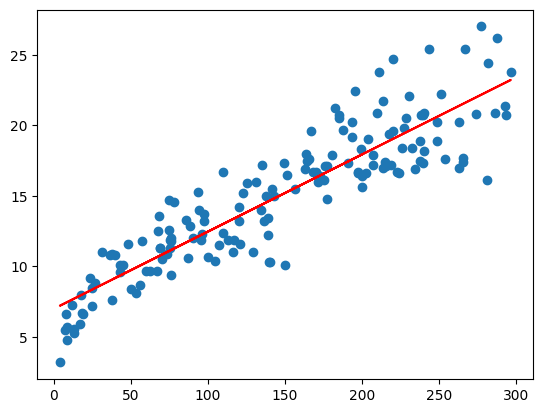

In [284]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,y_pred_train,color='red')

In [285]:
y_pred_test=m*X_test+c
y_pred_test

59     18.524475
5       7.470840
20     18.945826
198    22.513633
52     18.836384
19     15.055165
162    17.304197
55     17.878767
69     18.858272
2       7.935968
98     22.847431
10     10.611823
75      7.919552
142    19.060740
124    19.553229
63     12.614611
109    20.970502
78      7.290261
111    20.220824
185    18.212565
154    17.271365
130     7.033072
61     21.293355
87     13.052378
102    22.327582
121     8.023522
136     8.395624
1       9.429850
47     20.122327
172     8.067298
159    14.201518
39     19.471147
76      8.499594
91      8.559787
35     22.902152
178    22.136058
127    11.383389
169    22.551937
46     11.903238
174    19.164710
Name: TV, dtype: float64

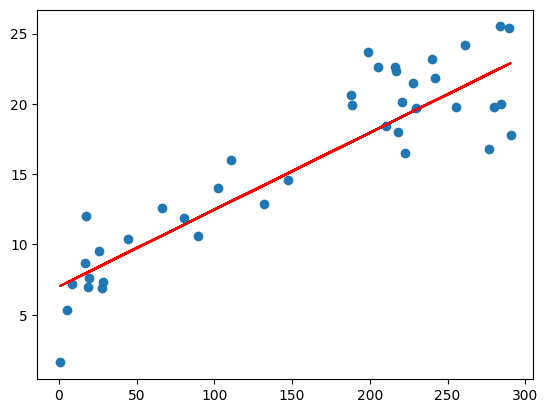

In [286]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,y_pred_test,color='red')